# 비지도 학습 예제 1

와인 품질 데이터로 클러스터링을 활용한 품질 분류
Kaggle의 Red Wine Quality Dataset을 사용

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [3]:
# 데이터 불러오기
df = pd.read_csv('winequality-red.csv')

In [4]:
# 데이터 구조 확인
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# 특성 선택 => quality는 화학적 특성이 아니므로 제외함
features = df.drop('quality', axis=1)

In [6]:
# 데이터 정규화
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

In [7]:
# K-Means 클러스터링
# 클러스터 수 : 3
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)
df['cluster'] = clusters

In [8]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [9]:
# 클러스터별 특성 및 품질 해석
print('각 클러스터별 평균 특성 : ')
print(df.groupby('cluster').mean())

print('\n각 클러스터의 품질 분포 : ')
print(df.groupby('cluster')['quality'].value_counts().sort_index())

각 클러스터별 평균 특성 : 
         fixed acidity  volatile acidity  citric acid  residual sugar  \
cluster                                                                 
0             7.189889          0.609342     0.123047        2.214058   
1            10.067131          0.405080     0.469761        2.582570   
2             8.155467          0.535173     0.289680        3.105467   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
cluster                                                                   
0         0.078553            13.507618             34.894737  0.995896   
1         0.100460            10.888446             30.627490  0.997574   
2         0.087235            27.108000             89.954667  0.997276   

               pH  sulphates    alcohol   quality  
cluster                                            
0        3.405762   0.609224  10.494044  5.552632  
1        3.195040   0.752131  10.724037  5.960159  
2        3.284267   0.626533   9.

In [ ]:
# PCA 시각화
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

pca_loading = pd.DataFrame(pca.components_, columns=features.columns, index=['PC1', 'PC2'])

print('PC1 주성분 비율 : \n')
print(pca_loading.loc['PC1'].sort_values(ascending=False))

print('\nPC2 주성분 비율 : \n')
print(pca_loading.loc['PC2'].sort_values(ascending=False))

PC1 기여도 정렬 : 

fixed acidity           0.489314
citric acid             0.463632
density                 0.395353
sulphates               0.242921
chlorides               0.212247
residual sugar          0.146107
total sulfur dioxide    0.023575
free sulfur dioxide    -0.036158
alcohol                -0.113232
volatile acidity       -0.238584
pH                     -0.438520
Name: PC1, dtype: float64

PC2 기여도 정렬 : 

total sulfur dioxide    0.569487
free sulfur dioxide     0.513567
volatile acidity        0.274930
residual sugar          0.272080
density                 0.233575
chlorides               0.148052
pH                      0.006711
sulphates              -0.037554
fixed acidity          -0.110503
citric acid            -0.151791
alcohol                -0.386181
Name: PC2, dtype: float64


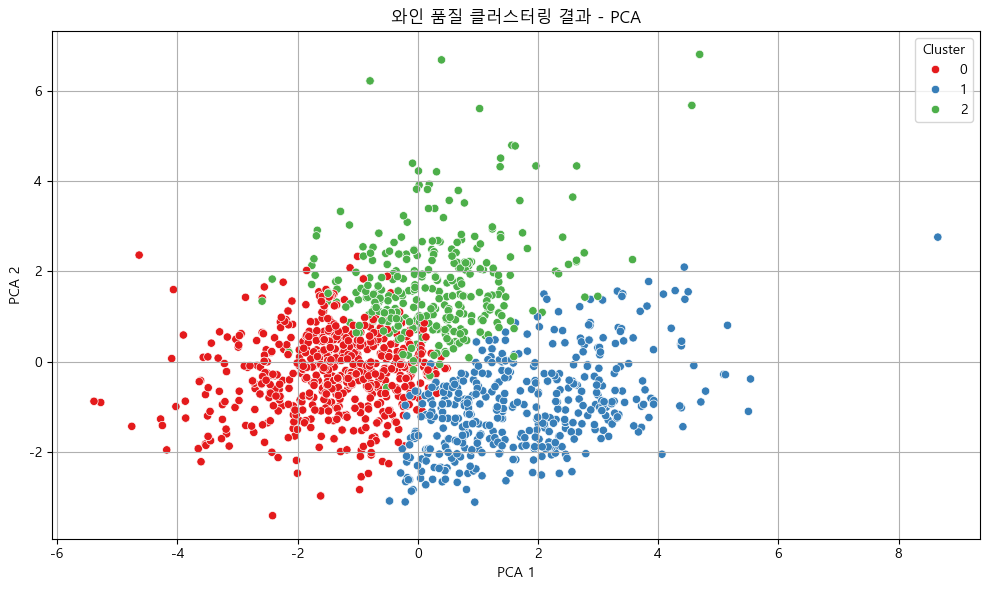

In [29]:
df['pca1'] = pca_result[:, 0]
df['pca2'] = pca_result[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='cluster', palette='Set1')

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.title('와인 품질 클러스터링 결과 - PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.grid()
plt.tight_layout()
plt.show()

비지도 학습 모델 방법 종류 : KMeans, IsolationForest, DBSCAN

비지도 학습 모델을 사용하는 이유 : 데이터 속에서 답(label)을 찾기 위해서

- 답 없는 데이터를 구조화하고 싶을 때 : KMeans, DBSCAN
- 평범한 집단 속에서 튀는 이상한 놈을 찾고 싶을 때 : DBSCAN, Isolation Forest

| 알고리즘             | 유형                 | 주 목적                             | 잘 쓰이는 상황 예시                                                                 |
|----------------------|----------------------|--------------------------------------|--------------------------------------------------------------------------------------|
| **KMeans**           | 클러스터링           | 데이터 내 *유사한 그룹* 찾기         | - 고객 세그먼트<br>- 와인 품질 분석<br>- 뉴스 기사 주제 분류<br>- 쇼핑 행동 유형 분석 |
| **DBSCAN**           | 밀도 기반 클러스터링 | 밀도 기반 *군집화 + 이상치 탐지*     | - GPS 위치 데이터 군집화<br>- 소셜 미디어 관심사 그룹핑<br>- 실험 데이터 클러스터링     |
| **Isolation Forest** | 이상치 탐지          | 데이터 속 *이상치(anomaly)* 찾기     | - 신용카드 사기 탐지<br>- 서버 이상 트래픽 감지<br>- 제조 설비 고장 징후 예측          |


- **KMeans**  
  → 서로 비슷한 애들끼리 나눠서 특성 좀 파악해보자!

- **DBSCAN**  
  → 밀집된 애들끼리 묶고 동떨어진 건 이상치로 봐야지!  
    - *e.g.* 사람들이 방문한 GPS 좌표를 DBSCAN으로 클러스터링하면 위치가 밀집된 곳 — 예: **맛집 밀집 지역**이나 **축제 현장** — 이 군집으로 잡힘  
    - 반면, 너무 외딴 위치(이상치)는 걸러짐  
    - 활용: 위치 기반 마케팅, 교통 흐름 분석

- **Isolation Forest**  
  → 다수와 확연히 다른 놈들만 콕 찍어서 걸러내자!  
    - *e.g.* 대부분 거래는 평범하지만, 누군가 갑자기 **새벽 4시에 해외에서 큰 금액을 결제**했다면?  
    - → 신용카드 사기 탐지에 활용됨

- **PCA**  
  → 차원이 너무 많아서 복잡한데, 핵심 축만 뽑아서 단순하게 보자!
